In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df0= pd.read_csv('cyberbully2(4).csv')

In [3]:
df0.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ethnicity/race,"the only thing i wish, i wish a nigga would",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,religion,You saudias are not friends of Muslim idiots c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data cleaning

In [4]:
#dropping columns
df0.drop(columns=[f'Unnamed: {i}' for i in range(2, 92)], inplace=True)


In [5]:
df0.head()

,v1,v2
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [6]:
df0.describe()

,v1,v2
count,182152,182178
unique,2112,113017
top,not_cyberbullying,Older people should not be in politics in India.
freq,66072,1472


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182191 entries, 0 to 182190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   v1      182152 non-null  object
 1   v2      182178 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [8]:
df0.shape

(182191, 2)

In [9]:
#check missing values
df0.isnull().sum()

v1    39
v2    13
dtype: int64

In [10]:
#renaming the columns
df0.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df0.head()

,target,text
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [11]:
#filling missing values
df0['target'].fillna(df0['target'].mode()[0], inplace= True)
df0['text'].fillna('hi', inplace= True)

In [12]:
#again checking missing values
df0.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#remove duplicates
df0 =df0.drop_duplicates(keep='first')

In [14]:
#check duplicate values
df0.duplicated().sum()#check duplicate values


0

Data Preprocessing

In [ ]:
#Label assigning
import pandas as pd

df0 = pd.DataFrame(df0)

# Define the allowed categories and their corresponding labels
manual_labels = {
    'not_cyberbullying': 0,
    'ethnicity/race': 1,
    'gender/sexual': 2,
    'religion': 3,
    'age': 4
}

# Filter the rows to keep only the valid categories in the 'target' column
df0 = df0[df0['target'].isin(manual_labels.keys())]

# Manually assign labels based on the dictionary
df0['target'] = df0['target'].map(manual_labels)

# Check the result
print(df0)


Empty DataFrame
Columns: [target, text]
Index: []


In [16]:
df0.head()

,target,text
0,1,@ZubearSays Any real nigga isn't letting this ...
1,0,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,1,"the only thing i wish, i wish a nigga would"
3,3,You saudias are not friends of Muslim idiots c...
4,3,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [17]:
#check null values
df0.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#check duplicate values
df0.duplicated().sum()

0

In [19]:
df0.shape

(109893, 2)

In [20]:
df0['target'].value_counts()

target
0    51096
2    17262
1    17201
3    16027
4     8307
Name: count, dtype: int64

In [21]:
df0.tail()

,target,text
182186,1,Yes thats a job unlike your indians fellows co...
182187,1,Stop crying rapiests and then cry about racism...
182188,1,You guys cry about racism and injustices of In...
182189,1,Dhoti balatkari muji cmt delete gardai tei cop...
182190,1,What the fuck do you mean small eyes you fucki...


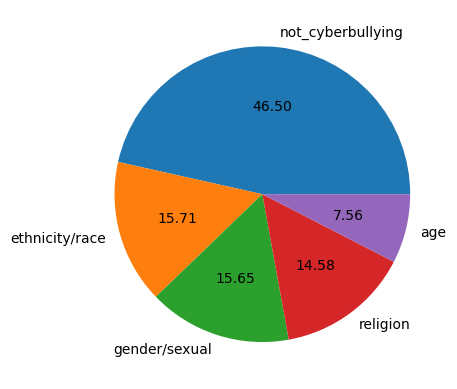

In [22]:
import matplotlib.pyplot as plt
plt.pie(df0['target'].value_counts(), labels=['not_cyberbullying', 'ethnicity/race','gender/sexual', 'religion','age'], autopct="%0.2f")
plt.show()

Major class undersampled randomly (not_cyberbullying dropped 50k to 20k )

In [23]:
from sklearn.utils import resample
import pandas as pd

In [24]:
# Separate majority (target=0) and minority classes
df_majority = df0[df0['target'] == 0]
df_minority = df0[df0['target'] != 0]

In [25]:
# Undersample majority class to match the second largest class
df_majority_downsampled = resample(
    df_majority, 
    replace=False,               # No replacement (subsampling)
    n_samples=20000,             # Match the second largest class count
    random_state=42              # Ensure reproducibility
)

In [26]:
# Combine undersampled majority class with minority classes
df = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


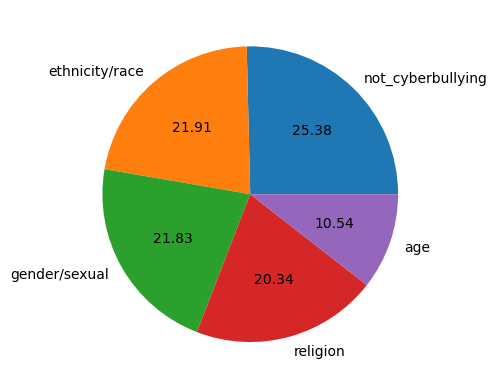

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not_cyberbullying', 'ethnicity/race','gender/sexual', 'religion','age'], autopct="%0.2f")
plt.show()

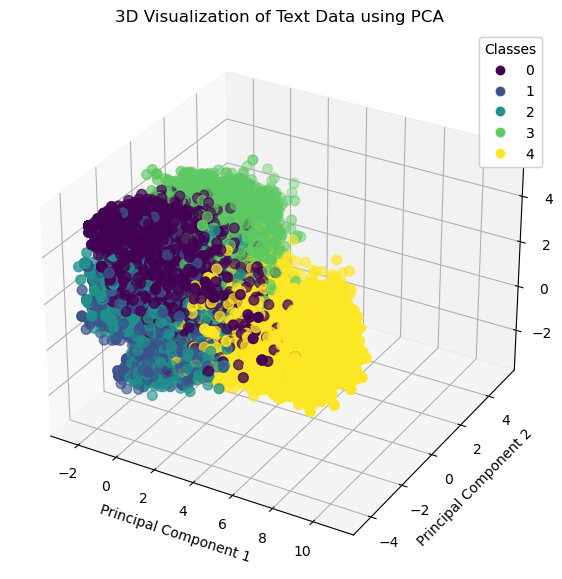

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# # Load dataset (assuming df is your cleaned dataset)
# df = pd.read_csv('/kaggle/input/cyberbully21/cyberbully2(1).csv')

# For visualization, we need numerical features.
# Let's assume 'text' is vectorized using TF-IDF (or any other method).
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)  # Limit features for simplicity
X = vectorizer.fit_transform(df['text']).toarray()

# Standardize features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plotting in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using different colors for each target class
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['target'], cmap='viridis', s=50)

# Add legend and labels
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

ax.set_title('3D Visualization of Text Data using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynabook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dynabook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
df['num_characters']= df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,4,"watching the girls at my school call me ugly ,...",103
1,2,I will make you my bitch soon.🥲 https://t.co/p...,55
2,0,@sarahdavs1 Of course! I always found it inter...,185
3,0,The world needs more understanding and less ju...,73
4,0,@cenobyte3 @Satori232323 They may not get as l...,94


In [34]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,4,"watching the girls at my school call me ugly ,...",103,24
1,2,I will make you my bitch soon.🥲 https://t.co/p...,55,10
2,0,@sarahdavs1 Of course! I always found it inter...,185,40
3,0,The world needs more understanding and less ju...,73,14
4,0,@cenobyte3 @Satori232323 They may not get as l...,94,20


In [36]:
#num of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,4,"watching the girls at my school call me ugly ,...",103,24,1
1,2,I will make you my bitch soon.🥲 https://t.co/p...,55,10,1
2,0,@sarahdavs1 Of course! I always found it inter...,185,40,3
3,0,The world needs more understanding and less ju...,73,14,2
4,0,@cenobyte3 @Satori232323 They may not get as l...,94,20,1


In [38]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,78797.000000,78797.000000,78797.000000
mean,137.129586,28.209310,1.897230
std,87.180233,17.595125,1.257001
min,2.000000,1.000000,1.000000
25%,64.000000,14.000000,1.000000
50%,110.000000,23.000000,1.000000
75%,206.000000,42.000000,2.000000
max,1578.000000,323.000000,20.000000


In [39]:
#non-cyberbullying
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20000.000000,20000.000000,20000.000000
mean,107.976850,21.996500,1.736800
std,59.457007,11.671859,0.985685
min,2.000000,1.000000,1.000000
25%,64.000000,13.000000,1.000000
50%,95.500000,19.000000,1.000000
75%,140.000000,29.000000,2.000000
max,829.000000,175.000000,15.000000


In [40]:
#ethnicity/race

df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,17201.000000,17201.000000,17201.000000
mean,113.152549,24.111156,1.640719
std,82.281361,17.375061,1.164984
min,12.000000,2.000000,1.000000
25%,54.000000,11.000000,1.000000
50%,81.000000,17.000000,1.000000
75%,144.000000,31.000000,2.000000
max,918.000000,181.000000,20.000000


In [41]:
#gender/sexual

df[df['target']==2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,17262.000000,17262.000000,17262.000000
mean,104.907137,22.391785,1.574209
std,75.867737,15.876725,1.028769
min,6.000000,2.000000,1.000000
25%,51.000000,11.000000,1.000000
50%,75.000000,16.000000,1.000000
75%,132.000000,29.000000,2.000000
max,790.000000,126.000000,13.000000


In [42]:
#religion

df[df['target']==3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,16027.000000,16027.000000,16027.000000
mean,219.650714,43.007675,2.606289
std,77.428224,15.539762,1.488960
min,6.000000,3.000000,1.000000
25%,151.000000,30.000000,1.000000
50%,244.000000,47.000000,2.000000
75%,279.000000,55.000000,3.000000
max,568.000000,110.000000,17.000000


In [43]:
#age

df[df['target']==4][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8307.000000,8307.000000,8307.000000
mean,164.713735,35.191044,2.117852
std,82.134642,18.017816,1.388770
min,6.000000,2.000000,1.000000
25%,92.000000,19.000000,1.000000
50%,157.000000,34.000000,2.000000
75%,246.000000,51.000000,3.000000
max,1578.000000,323.000000,19.000000


<Axes: xlabel='num_characters', ylabel='Count'>

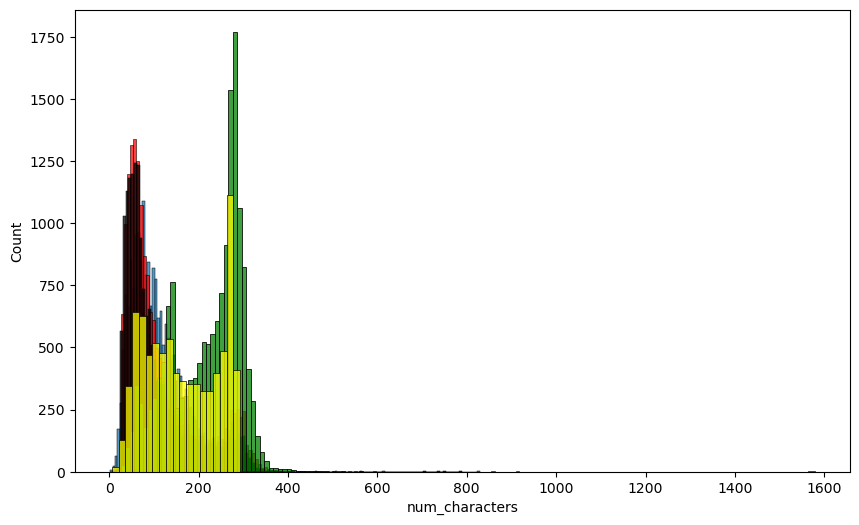

In [44]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
sns.histplot(df[df['target']==2]['num_characters'], color='black')
sns.histplot(df[df['target']==3]['num_characters'], color='green')
sns.histplot(df[df['target']==4]['num_characters'], color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

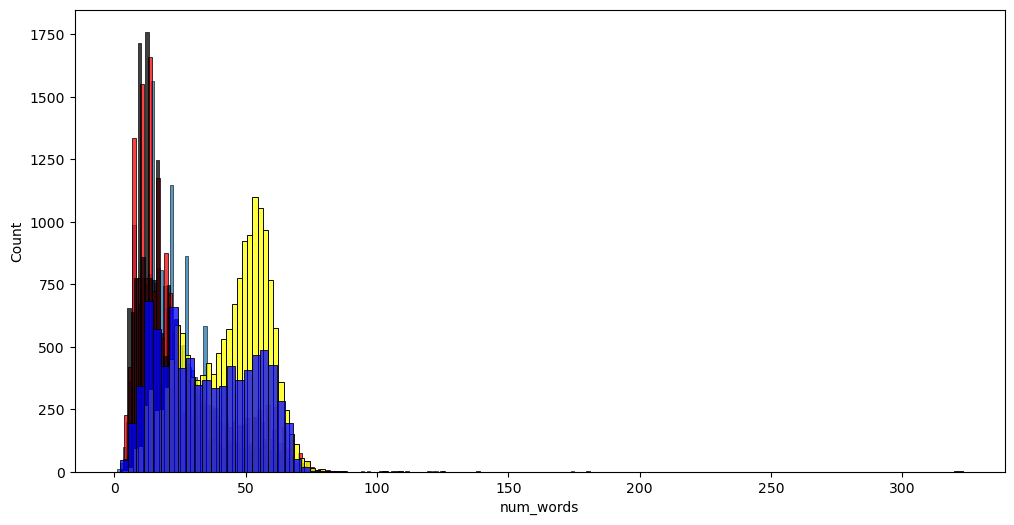

In [45]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')
sns.histplot(df[df['target']==2]['num_words'], color='black')
sns.histplot(df[df['target']==3]['num_words'], color='yellow')
sns.histplot(df[df['target']==4]['num_words'], color='blue')

In [46]:
# sns.pairplot(df,hue='target')

In [47]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynabook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords 


In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
# def transform_text(text):
#     text= text.lower()
#     text= nltk.word_tokenize(text)

#     y =[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)

#     text= y[:]
#     y.clear()

#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)

#     text = y[:]
#     y.clear()
#     for i in text:
#         y.append(ps.stem(i))       


#     return " ".join(y)

In [53]:
import nltk
import string
import spacy
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynabook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynabook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Define stopwords but keep negations
stop_words = set(stopwords.words('english'))
negation_words = {"not", "no", "nor", "never", "neither", "none", "nothing", "nobody", "nowhere",
                  "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", 
                  "wouldn't", "shouldn't", "couldn't", "mustn't", "don't", "doesn't", "didn't", 
                  "can't", "won't"}

filtered_stop_words = stop_words - negation_words  # Keep negations

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # Expand contractions (e.g., "aren't" → "are not")
    text = nltk.word_tokenize(text)  # Tokenization

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in filtered_stop_words and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Use spaCy for lemmatization
    doc = nlp(" ".join(text))
    for i in doc:
        y.append(i.lemma_)  # Lemmatization

    return " ".join(y)




In [55]:
# Example
transform_text("Muslims are not bad people, but they aren't always nice.") 

'muslim not bad people not always nice'

In [56]:
transform_text('i loved the YT lectures on Machine Learning. How about You ?')

'love yt lecture machine learning'

In [57]:
df['text'][0]

'watching the girls at my school call me ugly , (i never thought i would get bullied in high school)#Why'

Text transformation

In [58]:
df['transformed_text']= df['text'].apply(transform_text)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,4,"watching the girls at my school call me ugly ,...",103,24,1,watch girl school call ugly never think would ...
1,2,I will make you my bitch soon.🥲 https://t.co/p...,55,10,1,make bitch https
2,0,@sarahdavs1 Of course! I always found it inter...,185,40,3,sarahdavs1 course always find interesting ofte...
3,0,The world needs more understanding and less ju...,73,14,2,world need understand less judgment john teacher
4,0,@cenobyte3 @Satori232323 They may not get as l...,94,20,1,cenobyte3 satori232323 may not get large outdo...


In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

In [61]:
not_cyberbullying_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

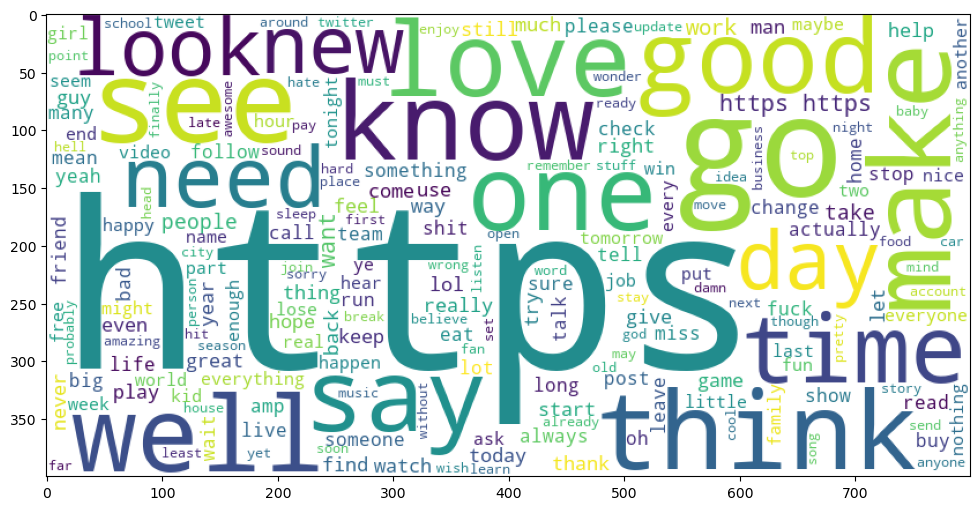

In [62]:
plt.figure(figsize=(12,6))
plt.imshow(not_cyberbullying_wc)

In [63]:
ethnicity_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

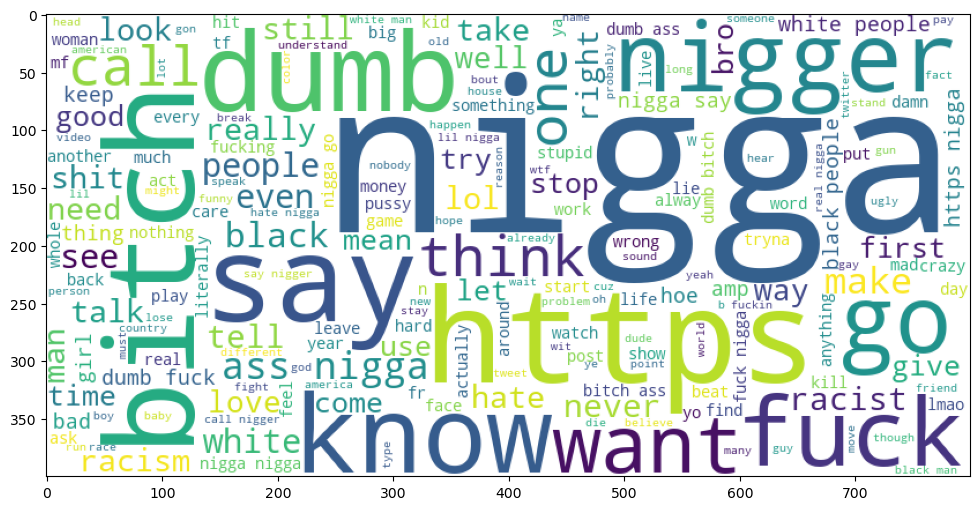

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ethnicity_wc)

In [65]:
gender_wc = wc.generate(df[df['target'] == 2]['transformed_text'].str.cat(sep=" "))

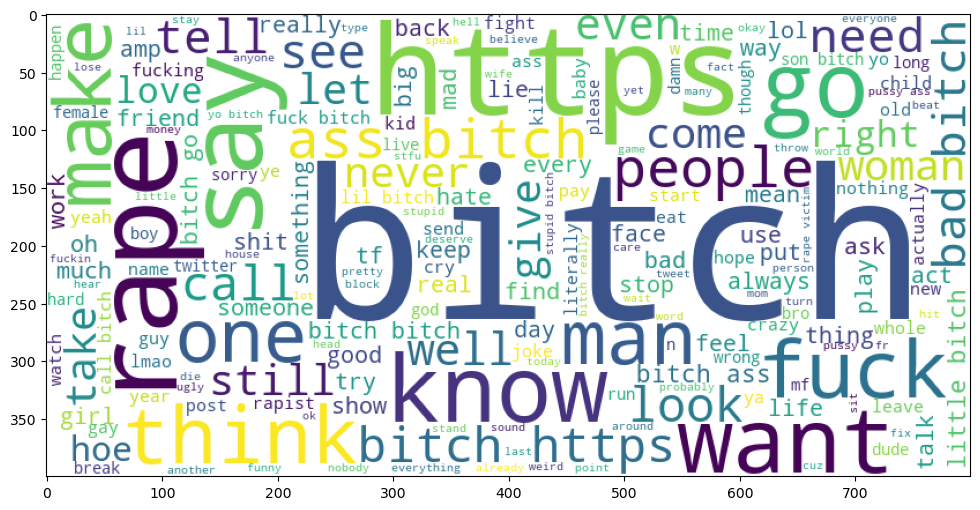

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(gender_wc)

In [67]:
religion_wc= wc.generate(df[df['target'] == 3]['transformed_text'].str.cat(sep=" "))

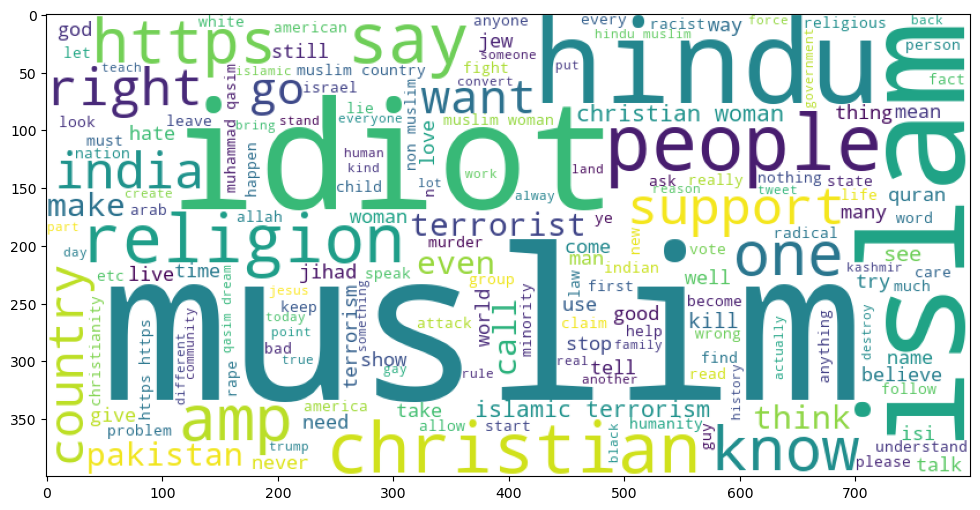

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(religion_wc)

In [69]:
from wordcloud import WordCloud
age_wc= wc.generate(df[df['target'] == 4]['transformed_text'].str.cat(sep=" "))

# # Ensure filtered text is valid
# filtered_text = df[df['target'] == 4]['transformed_text'].dropna().str.cat(sep=" ")

# if not filtered_text.strip():
#     print("No valid text to generate the WordCloud.")
# else:
#     wc = WordCloud(width=800, height=400)  # Adjust canvas size if necessary
#     age_wc = wc.generate(filtered_text)

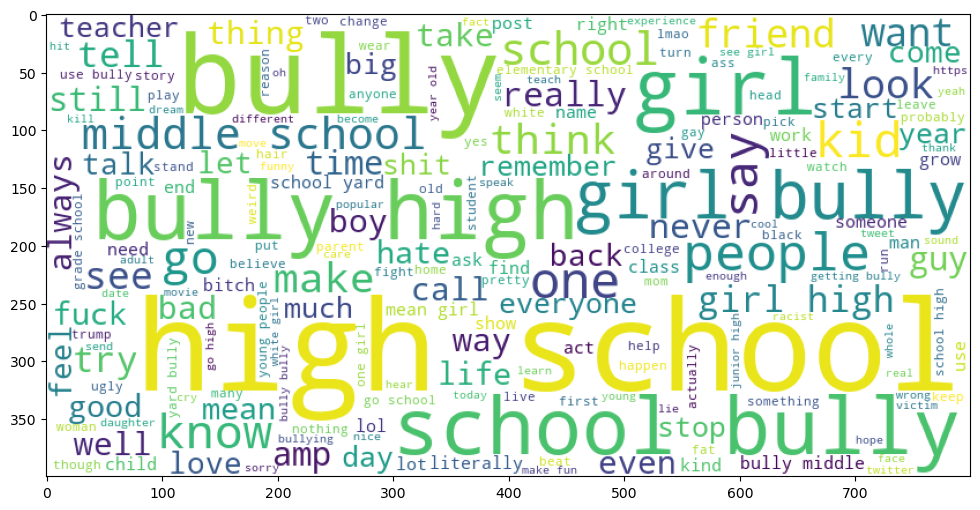

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(age_wc)

In [71]:
not_cyberbullying_corpus = []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        not_cyberbullying_corpus.append(word)

In [72]:
len(not_cyberbullying_corpus)

197441

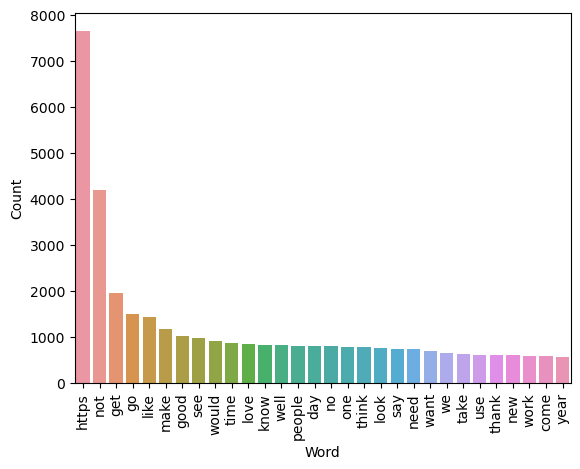

In [73]:
import seaborn as sns

from collections import Counter


# Assuming spam_corpus is defined
not_cyberbullying_counter = Counter(not_cyberbullying_corpus)
not_cyberbullying_df = pd.DataFrame(not_cyberbullying_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=not_cyberbullying_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [74]:
ethnicity_corpus = []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        ethnicity_corpus.append(word)

In [75]:
len(ethnicity_corpus)

196891

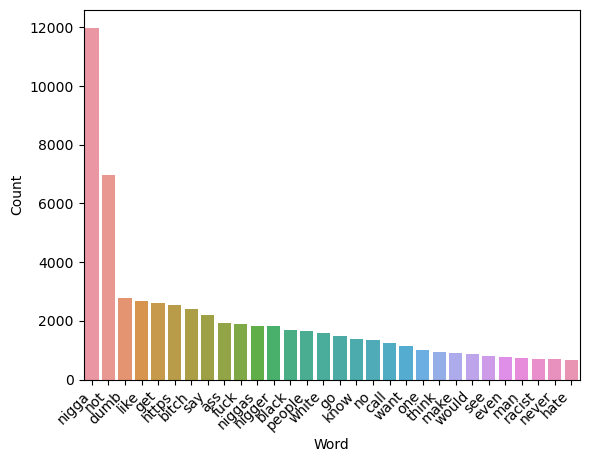

In [76]:
from collections import Counter


# Assuming spam_corpus is defined
ethnicity_counter = Counter(ethnicity_corpus)
ethnicity_df = pd.DataFrame(ethnicity_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=ethnicity_df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

In [77]:
gender_corpus = []
for msg in df[df['target']== 2]['transformed_text'].tolist():
    for word in msg.split():
        gender_corpus.append(word)

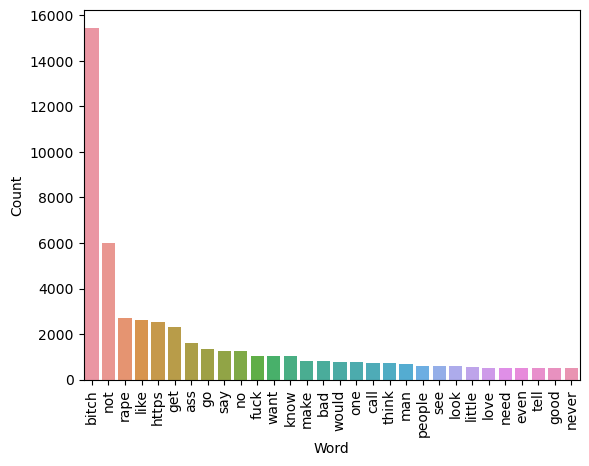

In [78]:
from collections import Counter


# Assuming spam_corpus is defined
gender_counter = Counter(gender_corpus)
gender_df = pd.DataFrame(gender_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=gender_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [79]:
religion_corpus = []
for msg in df[df['target']== 3]['transformed_text'].tolist():
    for word in msg.split():
        religion_corpus.append(word)

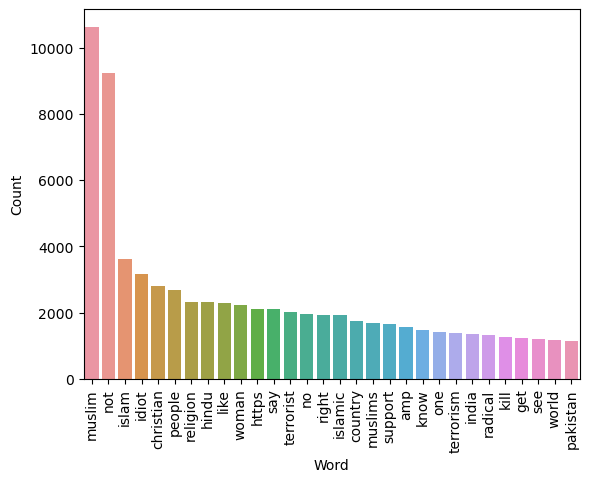

In [80]:
from collections import Counter


# Assuming spam_corpus is defined
religion_counter = Counter(religion_corpus)
religion_df = pd.DataFrame(religion_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=religion_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [81]:
age_corpus = []
for msg in df[df['target']== 4]['transformed_text'].tolist():
    for word in msg.split():
        age_corpus.append(word)

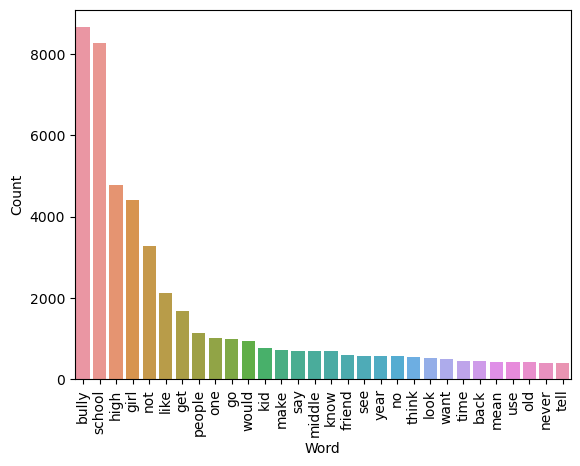

In [82]:
from collections import Counter


# Assuming spam_corpus is defined
age_counter = Counter(age_corpus)
age_df = pd.DataFrame(age_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=age_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

4.Model Building

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [84]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [85]:
X.shape

(78797, 3000)

In [86]:
y = df['target'].values

In [87]:
y

array([4, 2, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)


In [90]:
from collections import Counter

print("Training Class Distribution:", Counter(y_train))
print("Test Class Distribution:", Counter(y_test))


Training Class Distribution: Counter({0: 15992, 1: 13786, 2: 13766, 3: 12848, 4: 6645})
Test Class Distribution: Counter({0: 4008, 2: 3496, 1: 3415, 3: 3179, 4: 1662})


In [91]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
print("Training K-Nearest Neighbors...")
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
accuracy_knc = accuracy_score(y_test, y_pred_knc)
precision_knc = precision_score(y_test, y_pred_knc, average='weighted')
print(f"K-Nearest Neighbors - Accuracy: {accuracy_knc:.4f}, Precision: {precision_knc:.4f}")


Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.4929, Precision: 0.7416


In [93]:
# # Logistic Regression
# from sklearn.linear_model import LogisticRegression

# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# print("Training Logistic Regression...")
# lrc.fit(X_train, y_train)
# y_pred_lrc = lrc.predict(X_test)
# accuracy_lrc = accuracy_score(y_test, y_pred_lrc)
# precision_lrc = precision_score(y_test, y_pred_lrc, average='weighted')
# print(f"Logistic Regression - Accuracy: {accuracy_lrc:.4f}, Precision: {precision_lrc:.4f}")


In [94]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

dtc = DecisionTreeClassifier(max_depth=5)
print("Training Decision Tree...")
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
print(f"Decision Tree - Accuracy: {accuracy_dtc:.4f}, Precision: {precision_dtc:.4f}")


Training Decision Tree...
Decision Tree - Accuracy: 0.8223, Precision: 0.8900


In [95]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)
print("Training Extra Trees...")
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
accuracy_etc = accuracy_score(y_test, y_pred_etc)
precision_etc = precision_score(y_test, y_pred_etc, average='weighted')
print(f"Extra Trees - Accuracy: {accuracy_etc:.4f}, Precision: {precision_etc:.4f}")


Training Extra Trees...
Extra Trees - Accuracy: 0.9899, Precision: 0.9899


In [96]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
print("Training Random Forest...")
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc, average='weighted')
print(f"Random Forest - Accuracy: {accuracy_rfc:.4f}, Precision: {precision_rfc:.4f}")


Training Random Forest...
Random Forest - Accuracy: 0.9909, Precision: 0.9909


In [97]:
# # Support Vector Classifier
# from sklearn.svm import SVC

# svc = SVC(kernel='sigmoid', gamma=1.0)
# print("Training Support Vector Classifier...")
# svc.fit(X_train, y_train)
# y_pred_svc = svc.predict(X_test)
# accuracy_svc = accuracy_score(y_test, y_pred_svc)
# precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
# print(f"Support Vector Classifier - Accuracy: {accuracy_svc:.4f}, Precision: {precision_svc:.4f}")


In [98]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, random_state=2)
print("Training AdaBoost...")
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)
accuracy_abc = accuracy_score(y_test, y_pred_abc)
precision_abc = precision_score(y_test, y_pred_abc, average='weighted')
print(f"AdaBoost - Accuracy: {accuracy_abc:.4f}, Precision: {precision_abc:.4f}")


Training AdaBoost...
AdaBoost - Accuracy: 0.9348, Precision: 0.9375


In [100]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
print("Training Gradient Boosting...")
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)
precision_gbdt = precision_score(y_test, y_pred_gbdt, average='weighted')
print(f"Gradient Boosting - Accuracy: {accuracy_gbdt:.4f}, Precision: {precision_gbdt:.4f}")


Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9712, Precision: 0.9731


In [101]:
accuracy_scores = []
precision_scores = []
algorithms = ['KNeighborsClassifier','Decision Tree', 'Extra Trees', 'Random Forest', 'AdaBoostClassifier','GradientBoosting' ]  # Add your classifiers' names

# Append scores for each classifier
# accuracy_scores.append(accuracy_svc)
# precision_scores.append(precision_svc)

accuracy_scores.append(accuracy_knc)
precision_scores.append(precision_knc)

accuracy_scores.append(accuracy_dtc)
precision_scores.append(precision_dtc)

accuracy_scores.append(accuracy_etc)
precision_scores.append(precision_etc)

# accuracy_scores.append(accuracy_lrc)
# precision_scores.append(precision_lrc)

accuracy_scores.append(accuracy_rfc)
precision_scores.append(precision_rfc)

accuracy_scores.append(accuracy_abc)
precision_scores.append(precision_abc)

accuracy_scores.append(accuracy_gbdt)
precision_scores.append(precision_gbdt)




In [102]:
performance_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)


In [103]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")


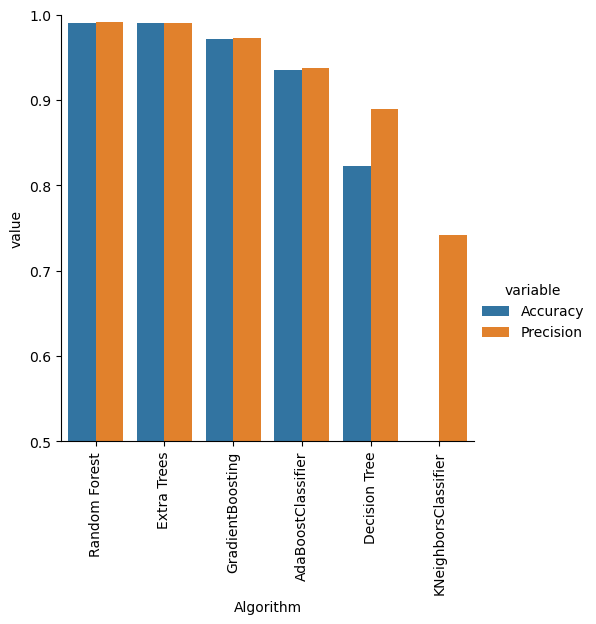

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)  # Adjust based on your range of values
plt.xticks(rotation='vertical')
plt.show()


Combining gradient, etc, random forest to make one model

In [105]:
# Voting Classifier

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2, n_jobs=-1)

from sklearn.ensemble import VotingClassifier

In [106]:
voting = VotingClassifier(estimators=[ ('GB', gbdt), ('et', etc)],voting='soft')

In [107]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('GB',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_jobs=-1, random_state=2))],
                 voting='soft')

In [108]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='weighted'))

Accuracy 0.9876903553299492
Precision 0.987947125274103


In [109]:
# Applying stacking
estimators=[ ('GB', gbdt), ('et', etc)]
final_estimator=RandomForestClassifier(n_estimators=200, random_state=2, n_jobs=-1)

In [110]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [111]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='weighted'))

Accuracy 0.9908629441624366
Precision 0.9909164908281194


In [112]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report


# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=list(manual_labels.keys()))
print("Classification Report:")
print(class_report)

Accuracy: 0.9909
Precision: 0.9909
Confusion Matrix:
[[3973    9    2   11   13]
 [  10 3399    0    6    0]
 [  13   10 3472    1    0]
 [  44    2    1 3132    0]
 [  18    3    1    0 1640]]
Classification Report:
                   precision    recall  f1-score   support

not_cyberbullying       0.98      0.99      0.99      4008
   ethnicity/race       0.99      1.00      0.99      3415
    gender/sexual       1.00      0.99      1.00      3496
         religion       0.99      0.99      0.99      3179
              age       0.99      0.99      0.99      1662

         accuracy                           0.99     15760
        macro avg       0.99      0.99      0.99     15760
     weighted avg       0.99      0.99      0.99     15760



In [113]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(clf,open('model1.pkl','wb'))

In [ ]:
# Test with sample input
test_text = [" "]
test_text_tfidf = tfidf.transform(test_text)  # Transform using the saved vectorizer

# Predict
prediction = clf.predict(test_text_tfidf)
print("Predicted Output:", prediction)

Predicted Output: [0]
